# Clustering

In [ ]:
# Clustering
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA  # reduce las dimensiones
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D # Importa para graficar en 3D
import random
from ipywidgets import interactive, fixed # Importa para la interactividad y fixed

In [ ]:

# Establecemos la semilla para NumPy
np.random.seed(13)
# Establecemos la semilla para el módulo random
random.seed(13)

n_features = 20 # Caracteristicas
n_samples = 20000
n_clusters = random.randint(2, 10)

# Estrategia para generar centros más separados
separation_factor = 2  # Ajusta este valor para mayor o menor separación
blob_centers = np.random.uniform(-separation_factor, separation_factor, size=(n_clusters, n_features))


# Desviación estándar para cada cluster
blob_std = np.random.uniform(0.1, 1, size=n_clusters)
# Generamos el dataset
X, y = make_blobs(n_samples=n_samples,
                  centers=blob_centers,
                  cluster_std=blob_std,
                  random_state=42,
                  n_features=n_features)

print(f"Forma del dataset: {X.shape}")
print(f"Valores unicos de y: {np.unique(y)} ")





Forma del dataset: (20000, 20)
Valores unicos de y: [0 1 2 3 4 5] 


In [ ]:
unique_labels, counts = np.unique(y, return_counts=True)
result = [(int(label), int(count)) for label, count in zip(unique_labels, counts)]
print(f"Valores únicos: {result}")

Valores únicos: [(0, 3334), (1, 3334), (2, 3333), (3, 3333), (4, 3333), (5, 3333)]


(20000, 2)


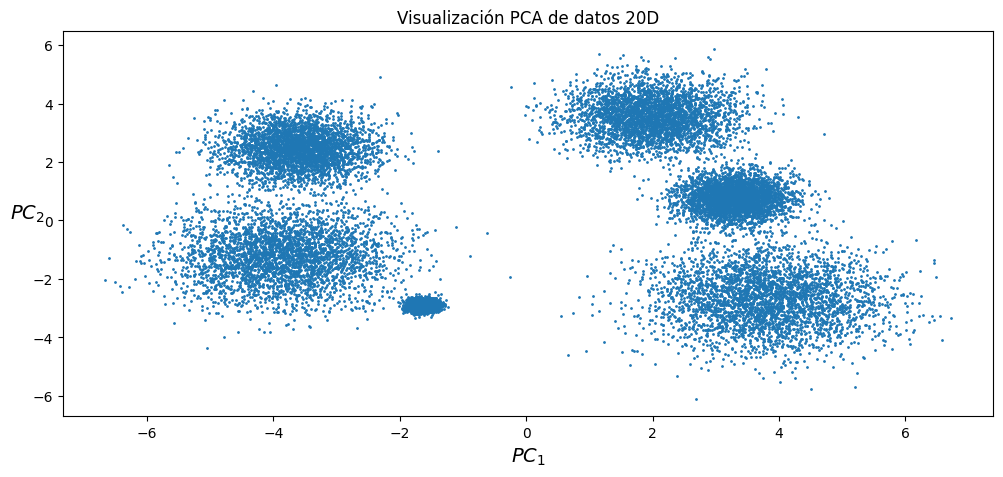

In [ ]:
# Para visualizar los datos 20D, usamos PCA para reducir a 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
print(X_2d.shape)
# print(X_2d[0:10])
# print(y[0:10])

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$PC_1$", fontsize=14)
    plt.ylabel("$PC_2$", fontsize=14, rotation=0)

plt.figure(figsize=(12, 5))
plot_clusters(X_2d)
plt.title("Visualización PCA de datos 20D")
plt.show()

In [ ]:
# Para visualizar los datos 20D, usamos PCA para reducir a 3D
pca = PCA(n_components=3)  # Cambiado a 3 componentes
X_3d = pca.fit_transform(X)

def plot_clusters_3d(X, y=None, elev=10, azim=0): # Añadidos elev y azim
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=None, s=1)
    ax.set_xlabel("$PC_1$", fontsize=14)
    ax.set_ylabel("$PC_2$", fontsize=14)
    ax.set_zlabel("$PC_3$", fontsize=14)
    ax.view_init(elev=elev, azim=azim)  # Establece el ángulo de visión
    plt.title("Visualización PCA de datos 20D a 3D")
    plt.show()

# Crea la visualización interactiva
interactive_plot = interactive(
    plot_clusters_3d,
    X=fixed(X_3d),  # Datos fijos
    y=fixed(y),    # Etiquetas fijas
    elev=(-90, 90, 5),  # Elevación: rango de -90 a 90 grados, paso de 10
    azim=(-180, 180, 5) # Azimut: rango de -180 a 180 grados, paso de 10
)

interactive_plot

interactive(children=(IntSlider(value=10, description='elev', max=90, min=-90, step=5), IntSlider(value=0, des…

verificamos la grafica y estimamos un valor para k

In [ ]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
print(y_pred)
# Obtener valores únicos y sus cantidades
unique_labels, counts = np.unique(y_pred, return_counts=True)
result = [(int(label), int(count)) for label, count in zip(unique_labels, counts)]
print(f"Valores únicos: {result}")


[1 2 0 ... 3 5 0]
Valores únicos: [(0, 3334), (1, 3333), (2, 3333), (3, 3335), (4, 3329), (5, 3336)]


In [ ]:
kmeans.cluster_centers_

array([[ 1.11253433, -1.05784151,  1.28108837,  1.86690999,  1.90186692,
        -0.17778106,  0.45150245,  1.09460649,  0.56148585,  0.88944955,
        -1.85688045, -0.80118735, -1.7719173 ,  1.41335991, -0.51006466,
         0.71752401, -0.96393805, -0.60850206, -1.93997112, -0.56747183],
       [ 0.76610249,  1.86131682, -0.86033416, -1.07600242,  1.39699427,
        -1.10947145,  0.75926055, -1.39621681, -1.1957287 , -1.73359863,
         1.00354898, -1.2757807 , -1.49677728, -1.08577706, -0.8739641 ,
        -1.8509347 , -0.99554836,  0.68166305,  1.04699828, -1.09079801],
       [-0.89464493,  0.79883178,  1.66557893, -1.02880153, -0.17242364,
        -0.99229072, -0.48197928,  0.42090573,  1.09276896, -1.73774388,
         0.74796227,  0.19942233, -1.44128518, -1.61566265, -1.01648846,
        -1.41674118,  1.72254913,  0.70859675, -1.03401567,  0.28538445],
       [ 1.83701967, -0.18747884, -1.48023638,  1.039361  , -1.19185206,
        -1.29699882, -0.25124161, -0.63505687,  

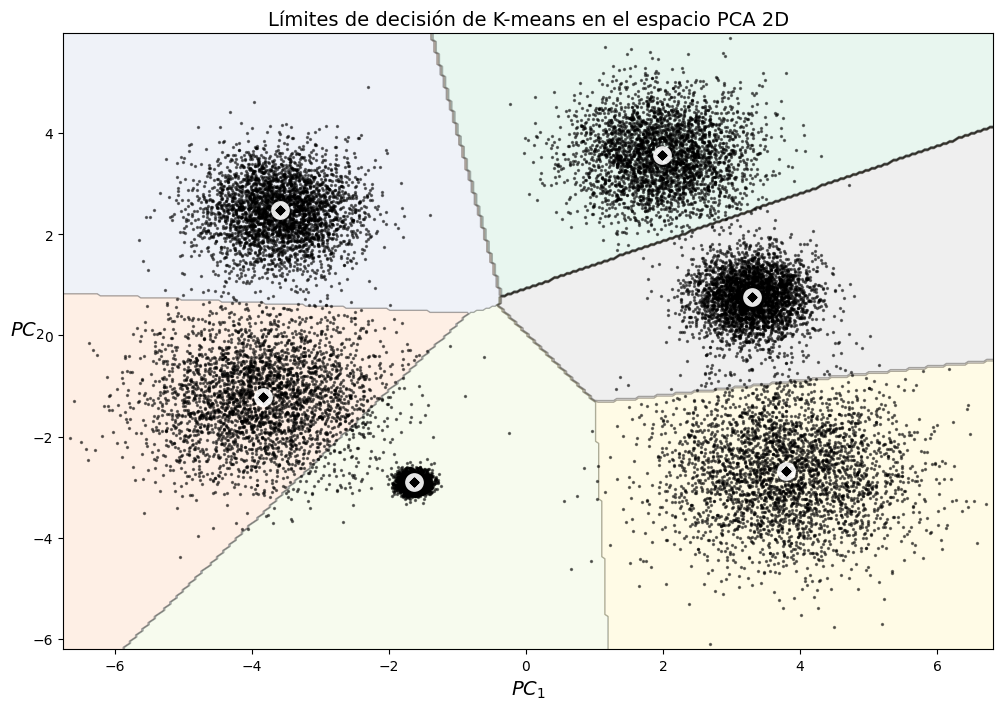

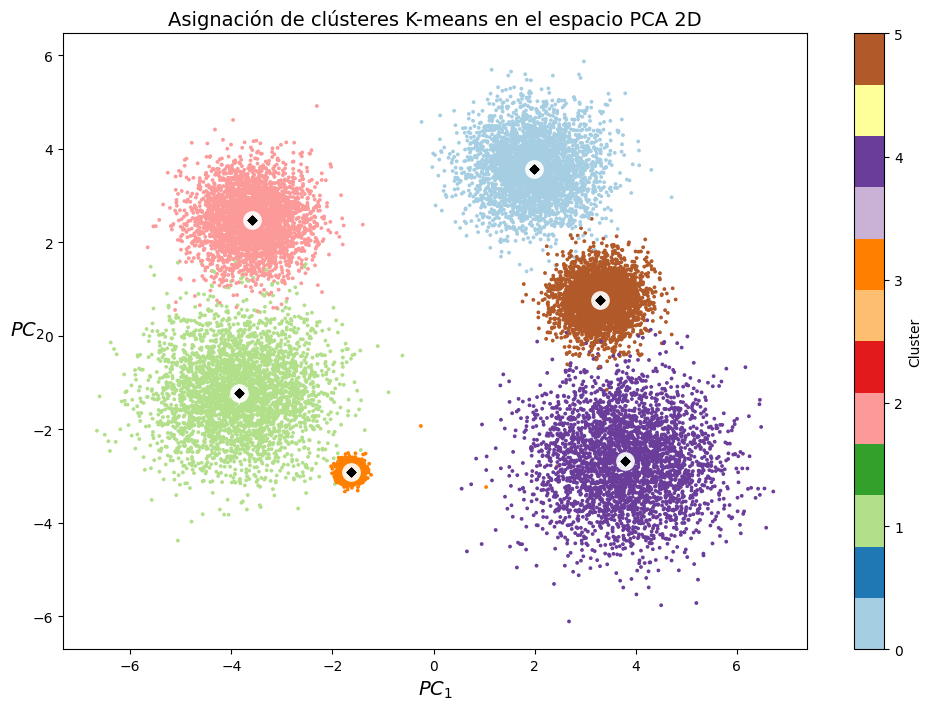

interactive(children=(IntSlider(value=10, description='elev', max=90, min=-90, step=5), IntSlider(value=0, des…

In [ ]:
def plot_data(X_2d):
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c='k', s=2, alpha=0.5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=5,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, X_2d, resolution=1000, show_centroids=True,
                          show_xlabels=True, show_ylabels=True):
    # Definimos los límites en el espacio 2D del PCA
    mins = X_2d.min(axis=0) - 0.1
    maxs = X_2d.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))

    # Crear un grid 2D de puntos
    grid_2d = np.c_[xx.ravel(), yy.ravel()]

    # Para cada punto en el grid 2D, necesitamos proyectarlo al espacio original
    # Esto no se puede hacer directamente porque PCA no es invertible de manera perfecta
    # En lugar de eso, predecimos directamente sobre X, y usamos los resultados para colorear

    # Usamos KMeans para predecir clústeres en los datos originales
    if not hasattr(clusterer, 'cluster_centers_'):
        clusterer.fit(X)

    # Ahora vamos a asignar cada punto del grid al clúster más cercano
    # Para esto, calculamos la distancia a cada centroide proyectado con PCA
    centroids_2d = pca.transform(clusterer.cluster_centers_)

    # Para cada punto en el grid 2D, encontrar el centroide más cercano
    distances = np.sqrt(((grid_2d[:, np.newaxis, :] - centroids_2d[np.newaxis, :, :]) ** 2).sum(axis=2))
    Z = distances.argmin(axis=1)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="Pastel2")
    plt.contour(xx, yy, Z, linewidths=1, colors='k', alpha=0.3)
    plot_data(X_2d)

    if show_centroids:
        plot_centroids(centroids_2d)

    if show_xlabels:
        plt.xlabel("$PC_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$PC_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title("Límites de decisión de K-means en el espacio PCA 2D", fontsize=14)
    plt.show()





# Ejemplo de uso con el código existente:
# Aplicar K-means
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Visualizar los límites de decisión
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
plot_decision_boundaries(kmeans, X, X_2d, resolution=300)

# Para visualizar con las etiquetas reales de los clústeres
plt.figure(figsize=(12, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, s=3, cmap="Paired")
plt.colorbar(label="Cluster")
plt.xlabel("$PC_1$", fontsize=14)
plt.ylabel("$PC_2$", fontsize=14, rotation=0)
centroids_2d = pca.transform(kmeans.cluster_centers_)
plot_centroids(centroids_2d)
plt.title("Asignación de clústeres K-means en el espacio PCA 2D", fontsize=14)
plt.show()

# Visualización en 3D con los clústeres
pca3d = PCA(n_components=3)
X_3d = pca3d.fit_transform(X)

def plot_clusters_3d_with_labels(X, y, elev=10, azim=0):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=3, cmap="Paired", alpha=0.7)

    # Añadir los centroides en 3D
    if kmeans is not None:
        centroids_3d = pca3d.transform(kmeans.cluster_centers_)
        ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2],
                  c='red', marker='x', s=100, linewidths=5)

    ax.set_xlabel("$PC_1$", fontsize=14)
    ax.set_ylabel("$PC_2$", fontsize=14)
    ax.set_zlabel("$PC_3$", fontsize=14)
    ax.view_init(elev=elev, azim=azim)

    plt.colorbar(scatter, label="Cluster")
    plt.title("Visualización PCA 3D con etiquetas de clústeres", fontsize=14)
    plt.show()

# Visualización interactiva en 3D con las etiquetas de clústeres
interactive_plot_with_labels = interactive(
    plot_clusters_3d_with_labels,
    X=fixed(X_3d),
    y=fixed(y_pred),
    elev=(-90, 90, 5),
    azim=(-180, 180, 5)
)

interactive_plot_with_labels

Puntuación de silueta para k=6: 0.4984
Calculando puntuaciones de silueta para diferentes valores de k...
k=2: Puntuación de silueta = 0.2960
k=3: Puntuación de silueta = 0.3372
k=4: Puntuación de silueta = 0.3945
k=5: Puntuación de silueta = 0.4580
k=6: Puntuación de silueta = 0.4984
k=7: Puntuación de silueta = 0.4700
k=8: Puntuación de silueta = 0.4289
k=9: Puntuación de silueta = 0.4271


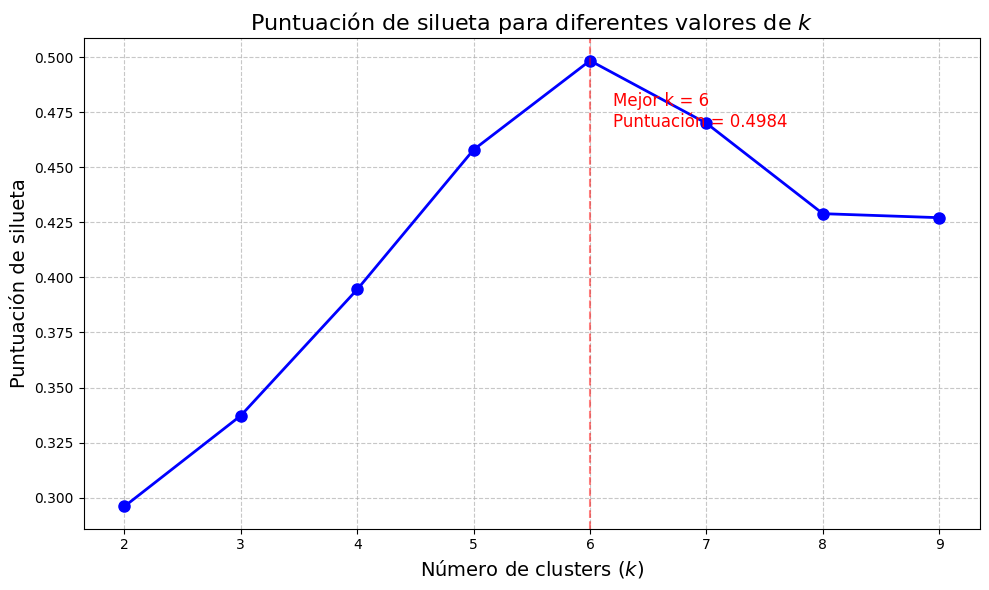


Generando análisis comparativo de siluetas para valores de k (modo: best)...
Mostrando gráficos de silueta para los 4 mejores valores de k: [5, 6, 7, 8]


<ipython-input-19-91b831b7ff76>:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Spectral')(np.linspace(0, 1, k))
<ipython-input-19-91b831b7ff76>:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Spectral')(np.linspace(0, 1, k))
<ipython-input-19-91b831b7ff76>:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Spectral')(np.linspace(0, 1, k))
<ipython-input-19-91b831b7ff76>:98: Matplot

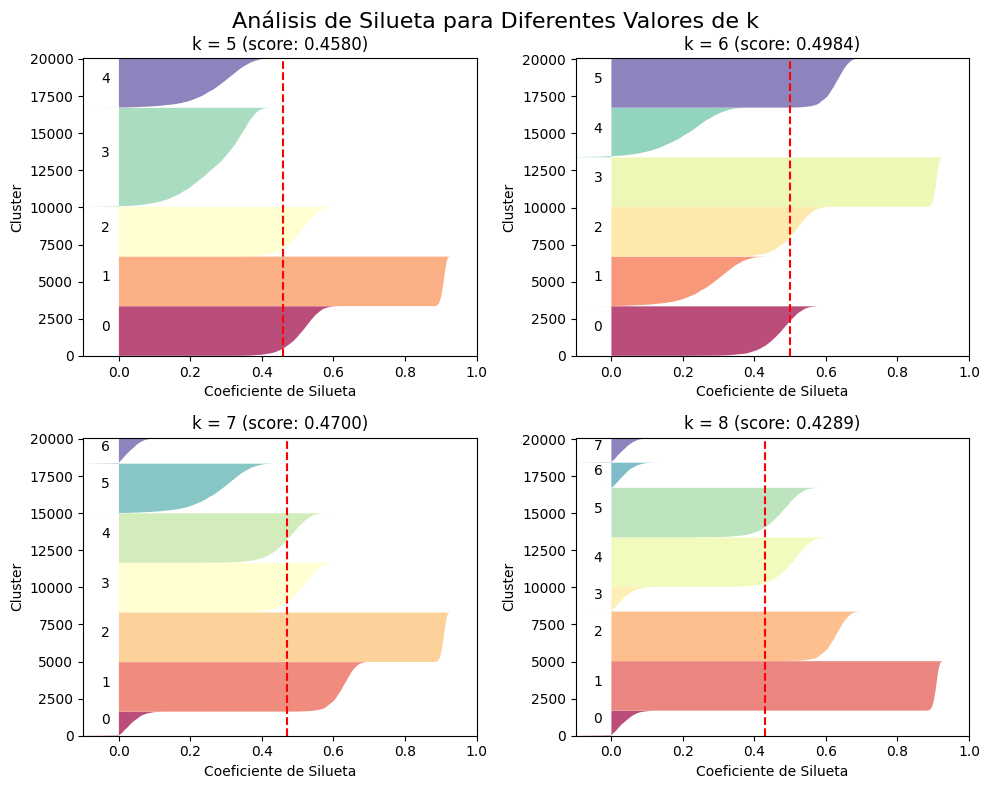


Mejor valor de k según análisis de silueta: 6
Puntuación de silueta para k=6: 0.4984

Distribución de clusters para k=6:
Cluster 0: 3334 muestras (16.67%)
Cluster 1: 3333 muestras (16.66%)
Cluster 2: 3333 muestras (16.66%)
Cluster 3: 3335 muestras (16.68%)
Cluster 4: 3329 muestras (16.64%)
Cluster 5: 3336 muestras (16.68%)


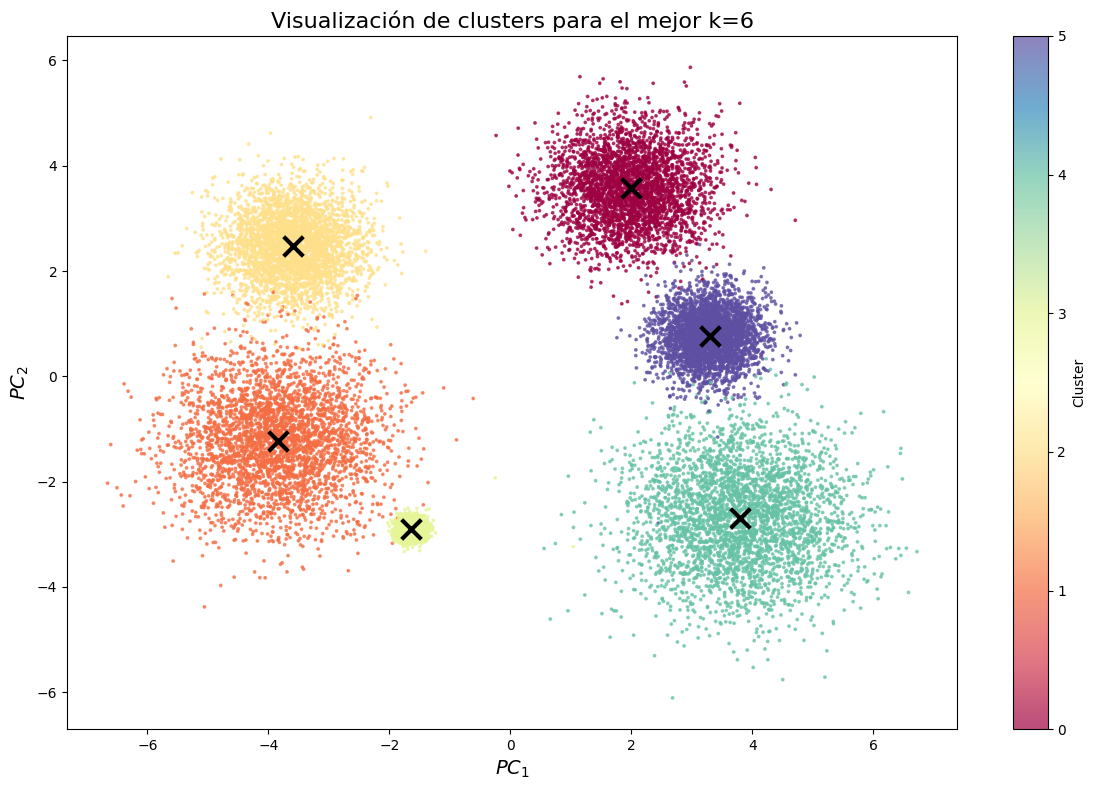

MÉTODO DEL CODO


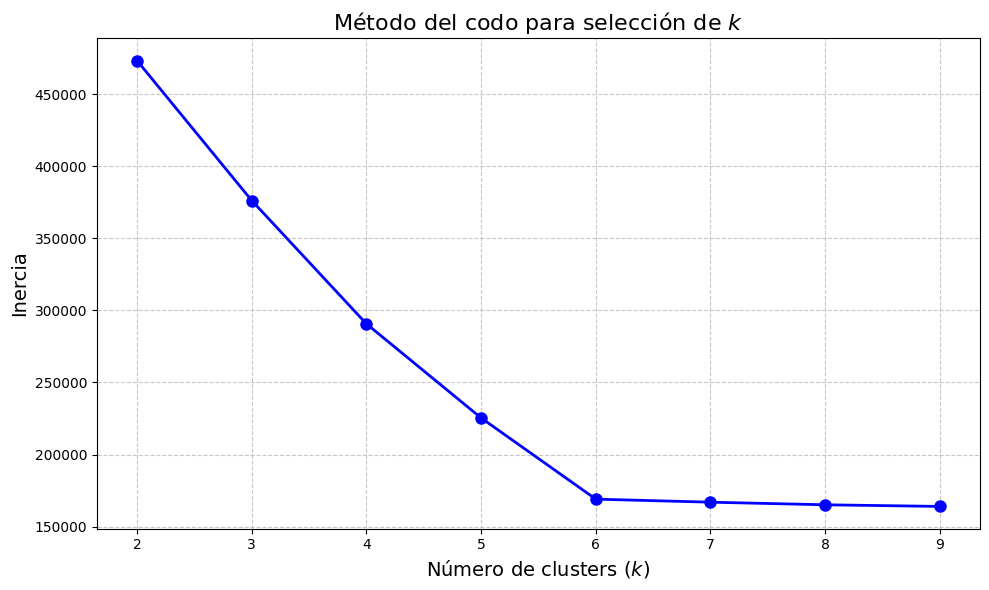

In [ ]:
# Calculamos la puntuación de silueta para el modelo k=6 ya entrenado
silhouette_score_value = silhouette_score(X, kmeans.labels_)
print(f"Puntuación de silueta para k=6: {silhouette_score_value:.4f}")

# Calculamos puntuaciones de silueta para diferentes valores de k
print("Calculando puntuaciones de silueta para diferentes valores de k...")
# Usamos n_init=10 para consistencia y evitar advertencias
k_range = range(2, 10)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in k_range]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]

# Mostramos las puntuaciones para cada k
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: Puntuación de silueta = {score:.4f}")

# Visualizamos la puntuación de silueta para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, "bo-", linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Número de clusters ($k$)", fontsize=14)
plt.ylabel("Puntuación de silueta", fontsize=14)
plt.title("Puntuación de silueta para diferentes valores de $k$", fontsize=16)

# Añadimos una línea para marcar el k con la mejor puntuación de silueta
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.5)
plt.text(best_k + 0.2, best_score - 0.03,
         f"Mejor k = {best_k}\nPuntuación = {best_score:.4f}",
         fontsize=12, color='r')

plt.xticks(k_range)
plt.tight_layout()
plt.show()

# Función para visualizar múltiples gráficos de silueta
def plot_multiple_silhouettes(X, k_range, kmeans_per_k, silhouette_scores, mode='best', num_best=4):
    """
    Visualiza gráficos de silueta para múltiples valores de k.

    Parámetros:
    - X: Datos de entrada
    - k_range: Rango de valores k analizados
    - kmeans_per_k: Lista de modelos KMeans entrenados para cada k
    - silhouette_scores: Lista de puntuaciones de silueta para cada k
    - mode: 'best' para mostrar solo los mejores valores de k, 'all' para mostrar todos
    - num_best: Número de mejores valores k a mostrar si mode='best'
    """
    if mode == 'best':
        # Identificamos los mejores valores de k según puntuación de silueta
        best_k_indices = np.argsort(silhouette_scores)[-num_best:]  # Ordenamos e identificamos los mejores
        best_k_indices = sorted(best_k_indices)  # Los ordenamos de menor a mayor k
        k_to_show = [k_range[idx] for idx in best_k_indices]  # Obtenemos los valores de k
        print(f"Mostrando gráficos de silueta para los {num_best} mejores valores de k: {k_to_show}")
    else:  # mode == 'all'
        k_to_show = list(k_range)
        print(f"Mostrando gráficos de silueta para todos los valores de k: {k_to_show}")

    # Determinar la disposición de los subplots
    n_plots = len(k_to_show)
    if n_plots <= 4:
        n_rows, n_cols = 2, 2
    elif n_plots <= 6:
        n_rows, n_cols = 2, 3
    elif n_plots <= 9:
        n_rows, n_cols = 3, 3
    else:
        n_rows, n_cols = (n_plots + 3) // 4, 4  # Aproximación para distribuir los plots

    # Creamos una cuadrícula de subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]  # Convertir a lista para manejar el caso de un solo subplot

    for i, k in enumerate(k_to_show):
        if i < len(axes):
            ax = axes[i]

            # Obtenemos el modelo KMeans para este valor de k
            k_idx = list(k_range).index(k)  # Índice en la lista kmeans_per_k
            kmeans = kmeans_per_k[k_idx]

            # Calculamos los valores de silueta para este modelo
            silhouette_vals = silhouette_samples(X, kmeans.labels_)

            # Rango del gráfico de silueta
            ax.set_xlim([-0.1, 1])

            # Altura para el gráfico (ajustamos dinámicamente)
            y_lower = 10

            # Colores para los clusters
            colors = plt.cm.get_cmap('Spectral')(np.linspace(0, 1, k))

            # Promedio global de silueta para este k
            avg_score = np.mean(silhouette_vals)

            for j in range(k):
                # Valores de silueta para el cluster j
                ith_cluster_values = silhouette_vals[kmeans.labels_ == j]
                ith_cluster_values.sort()

                size_cluster = ith_cluster_values.shape[0]
                y_upper = y_lower + size_cluster

                ax.fill_betweenx(np.arange(y_lower, y_upper),
                                0, ith_cluster_values,
                                facecolor=colors[j], edgecolor='none', alpha=0.7)

                # Etiquetamos los clusters
                ax.text(-0.05, y_lower + 0.5 * size_cluster, str(j))

                y_lower = y_upper + 10

            # Añadimos la línea de promedio
            ax.axvline(x=avg_score, color="r", linestyle="--")

            # Configuramos el título y etiquetas
            score = silhouette_scores[k_idx]
            ax.set_title(f"k = {k} (score: {score:.4f})", fontsize=12)
            ax.set_xlabel("Coeficiente de Silueta", fontsize=10)
            ax.set_ylabel("Cluster", fontsize=10)

            # Ajustamos para que se vean los valores del eje y
            max_y = y_lower
            ax.set_ylim([0, max_y])

    # Ocultar ejes extras si hay más subplots que valores de k
    for i in range(len(k_to_show), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle("Análisis de Silueta para Diferentes Valores de k", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# Visualizamos la comparativa de siluetas - Puedes elegir entre:
# 'best' para ver solo los mejores k valores (por defecto los 4 mejores)
# 'all' para ver todos los valores de k analizados
visualization_mode = 'best'  # Cambiar a 'all' para ver todos o 'best' para ver solo los mejores
num_best_k = 4  # Número de mejores valores de k a mostrar si mode='best'

''' ------------------------------------------------------------------------------------ '''

print(f"\nGenerando análisis comparativo de siluetas para valores de k (modo: {visualization_mode})...")
plot_multiple_silhouettes(X, k_range, kmeans_per_k, silhouette_scores,
                         mode=visualization_mode, num_best=num_best_k)

# Encontramos el mejor modelo basado en la puntuación de silueta
best_k_index = np.argmax(silhouette_scores)
best_k_value = k_range[best_k_index]
best_kmeans = kmeans_per_k[best_k_index]

print(f"\nMejor valor de k según análisis de silueta: {best_k_value}")
print(f"Puntuación de silueta para k={best_k_value}: {silhouette_scores[best_k_index]:.4f}")

''' ------------------------------------------------------------------------------------ '''
# Comparamos la distribución de clusters para el mejor modelo
unique_labels, counts = np.unique(best_kmeans.labels_, return_counts=True)
cluster_distribution = [(int(label), int(count)) for label, count in zip(unique_labels, counts)]
print(f"\nDistribución de clusters para k={best_k_value}:")
for label, count in cluster_distribution:
    print(f"Cluster {label}: {count} muestras ({count/len(X)*100:.2f}%)")

# Visualizamos los clusters del mejor modelo
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=best_kmeans.labels_, s=3, cmap="Spectral", alpha=0.7)
plt.colorbar(label="Cluster")

# Añadimos los centroides
centroids_2d = pca.transform(best_kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
           marker='x', s=200, linewidths=3, color='k', zorder=10)

plt.title(f"Visualización de clusters para el mejor k={best_k_value}", fontsize=16)
plt.xlabel("$PC_1$", fontsize=14)
plt.ylabel("$PC_2$", fontsize=14)
plt.tight_layout()
plt.show()

''' ------------------------------------------------------------------------------------ '''
# Como complemento, podemos visualizar el codo (elbow) para selección de k
print(f"MÉTODO DEL CODO")
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, "bo-", linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Número de clusters ($k$)", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.title("Método del codo para selección de $k$", fontsize=16)
plt.xticks(k_range)
plt.tight_layout()
plt.show()